# Transition map analysis

In [1]:
import cospar as cs

In [2]:
cs.logging.print_version()
cs.settings.verbosity = 2  # range: 0 (error),1 (warning),2 (info),3 (hint).
cs.settings.set_figure_params(
    format="png", figsize=[4, 3.5], dpi=75, fontsize=14, pointsize=3
)

Running cospar 0.2.0 (python 3.8.12) on 2022-02-08 19:23.


In [3]:
# Each dataset should have its folder to avoid conflicts.
cs.settings.data_path = "data_cospar"
cs.settings.figure_path = "fig_cospar"
cs.hf.set_up_folders()

Load an existing dataset. (If you have pre-processed data, you can load it with `cs.hf.read(file_name)`.)

In [4]:
adata_orig = cs.datasets.hematopoiesis_subsampled()

Generate a transition map

In [5]:
adata = cs.tmap.infer_Tmap_from_multitime_clones(
    adata_orig,
    clonal_time_points=["2", "4"],
    later_time_point="6",
    smooth_array=[20, 15, 10, 5],
    sparsity_threshold=0.1,
    intraclone_threshold=0.2,
    max_iter_N=10,
    epsilon_converge=0.01,
)

Trying to set attribute `.uns` of view, copying.


------Compute the full Similarity matrix if necessary------
------Infer transition map between initial time points and the later time one------
--------Current initial time point: 2--------
Step 1: Select time points
Number of multi-time clones post selection: 185
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.942
Iteration 5, Use smooth_round=5
Convergence (CoSpar, iter_N=5): corr(previous_T, current_T)=0.996
--------Current initial time point: 4--------
Step 1: Select time points
Number of multi-time clones post selection: 500
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar,

In [6]:
# adata=cs.hf.read('data_cospar/LARRY_sp500_ranking1_MultiTimeClone_Later_FullSpace0_t*2*4*6_adata_with_transition_map.h5ad')

### Key parameters

The analysis is done with the plotting module. There are some common parameters for the APIs in this module:

* **source** (`str`; default: `transition_map`). It determines which transition map to use for analysis. Choices: {`transition_map`, `intraclone_transition_map`, `OT_transition_map`, `HighVar_transition_map`, `clonal_transition_map`}

* **selected_fates** (`list` of `str`). Selected clusters to aggregate differentiation dynamics and visualize fate bias etc.. It allows nested structure, e.g., selected_fates=[‘a’, [‘b’, ‘c’]] selects two clusters: cluster ‘a’ and the other that combines ‘b’ and ‘c’.

* **map_backward** (`bool`; default: True). We can analyze either the backward transitions, i.e., where these selected states or clusters came from (`map_backward=True`); or the forward transitions, i.e., where the selected states or clusters are going (`map_backward=False`).

* **selected_times** (`list`; default: all). List of time points to use. By default, all are used. 

* **method** (`str`; default: `norm-sum`). Method to aggregate the transition probability within a cluster. Choices: {`norm-sum`,`sum`}. `norm-sum` returns the probability that a fate cluster originates from an early state *i*; while `sum` gives the probability that an initial state *i* gives rise to a fate cluster.  

### Plotting transition profiles for single cells

First, check the forward transitions (i.e., future states) from the `'transition_map'`.

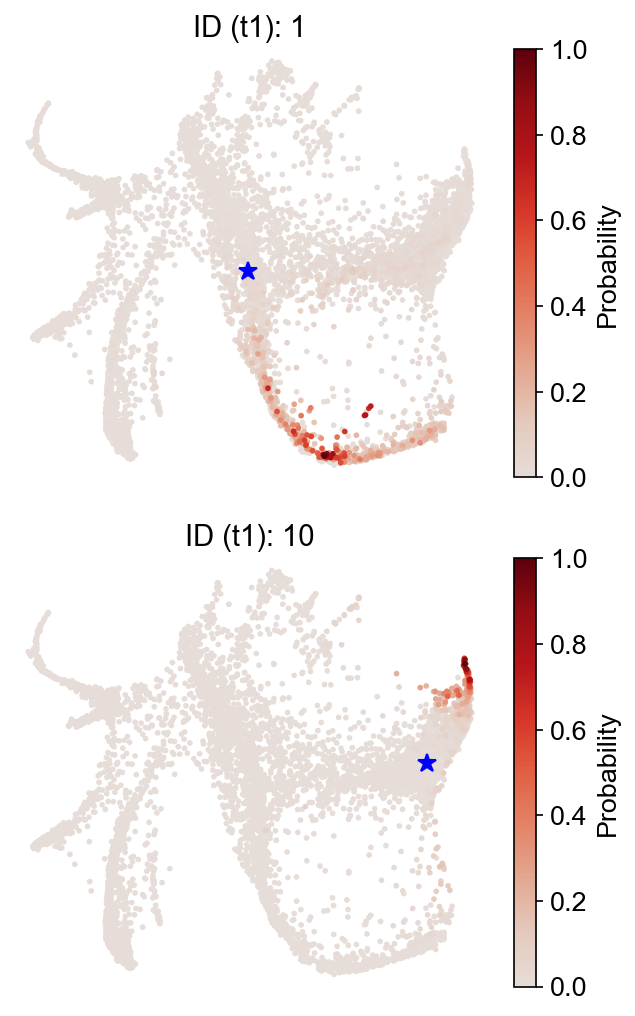

In [7]:
selected_state_id_list = [
    1,
    10,
]  # This is a relative ID. Its mapping to the actual cell id depends on map_backward.

map_backward = False
cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    source="transition_map",
    map_backward=map_backward,
)

Now, backward transitions (i.e., past states) from the same map.

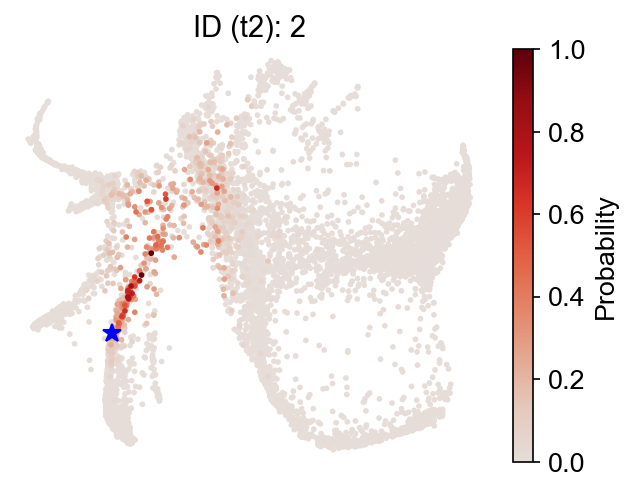

In [8]:
selected_state_id_list = [2]
map_backward = True
cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    source="transition_map",
    map_backward=map_backward,
)

Finally, switch to the `'intraclone_transition_map'`, and check the observed clonal transitions:

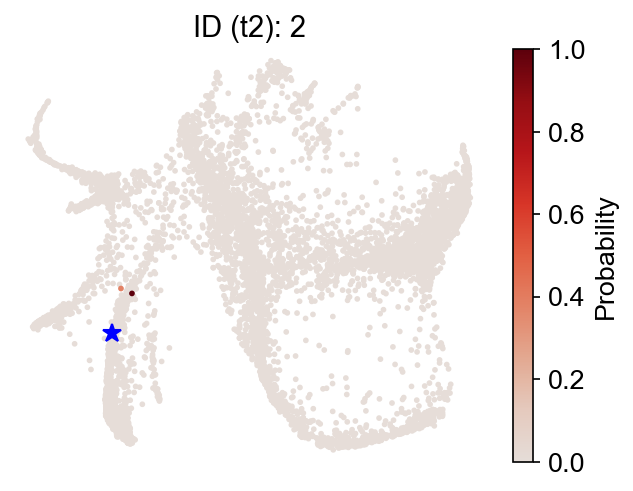

In [9]:
selected_state_id_list = [2]
map_backward = True
cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    source="intraclone_transition_map",
    map_backward=map_backward,
)

### Fate map

Inspect the backward transitions, and ask where the selected fate clusters come from.

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']


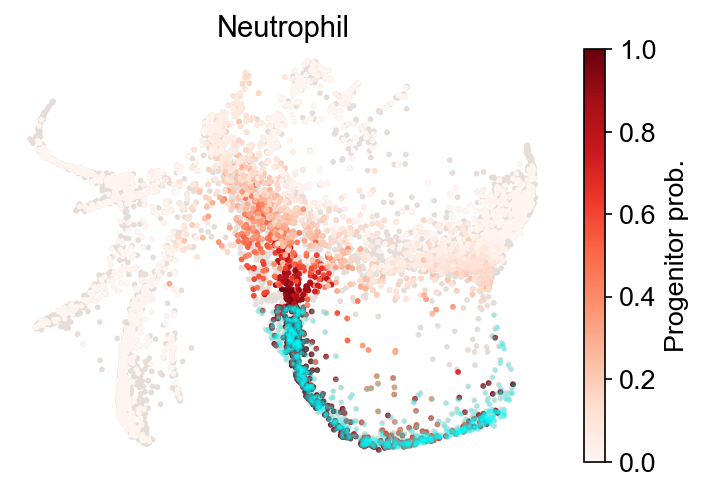

In [10]:
cs.tl.fate_map(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
)
cs.pl.fate_map(
    adata,
    selected_fates=["Neutrophil"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

The results are stored at `adata.obs[f'fate_map_{source}_{fate_name}']`, which can be used for a customized analysis.

In [11]:
adata.obs.keys()

Index(['time_info', 'state_info', 'n_counts',
       'fate_map_transition_map_Neutrophil',
       'fate_map_transition_map_Monocyte'],
      dtype='object')

As an example of how to use this data, you can re-plot the fate map as follows:

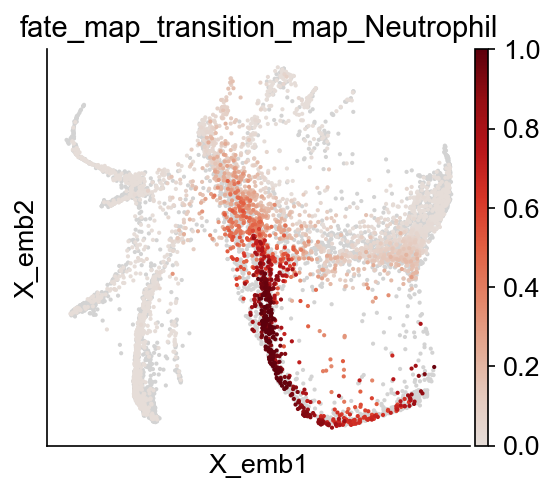

In [12]:
cs.pl.embedding(adata, color="fate_map_transition_map_Neutrophil")

### Fate potency

Count fate number directly (`fate_count=True`); otherwise, calculate the potencyusing entropy. The results are stored at `adata.obs[f'fate_potency_{source}']`.

Results saved at adata.obs['fate_map_transition_map_Ccr7_DC']
Results saved at adata.obs['fate_map_transition_map_Neu_Mon']
Results saved at adata.obs['fate_map_transition_map_undiff']
Results saved at adata.obs['fate_map_transition_map_Mast']
Results saved at adata.obs['fate_map_transition_map_Erythroid']
Results saved at adata.obs['fate_map_transition_map_Baso']
Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_pDC']
Results saved at adata.obs['fate_map_transition_map_Lymphoid']
Results saved at adata.obs['fate_map_transition_map_Meg']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_map_transition_map_Eos']
Results saved at adata.obs['fate_potency_transition_map']


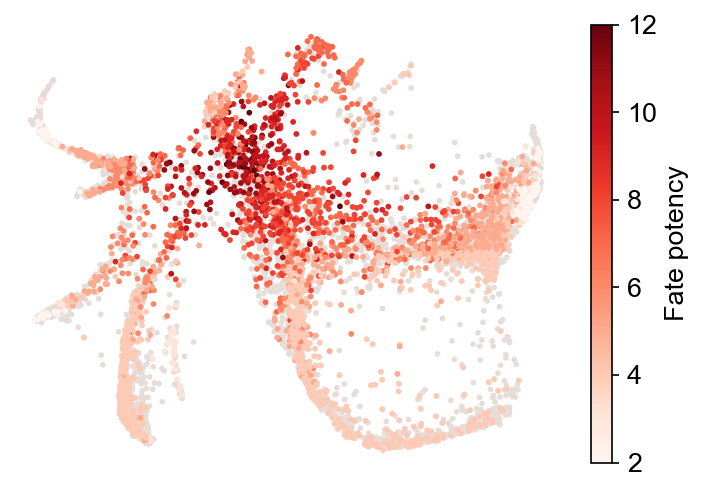

In [13]:
cs.tl.fate_potency(
    adata,
    source="transition_map",
    map_backward=True,
    method="norm-sum",
    fate_count=True,
)
cs.pl.fate_potency(adata, source="transition_map")

### Fate bias

The fate bias of an initial state *i* is defined by the competition of fate probability towards two fate clusters A and B: 
    
* Bias_i=`P(i;A)/[P(i;A)+P(i;B)]`.
    
Only states with fate probabilities satisfying this criterion will be shown: 

* P(i; A)+P(i; B)>sum_fate_prob_thresh

The inferred fate bias is stored at `adata.obs[f'fate_bias_{source}_{fate_A}*{fate_B}']`.

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']


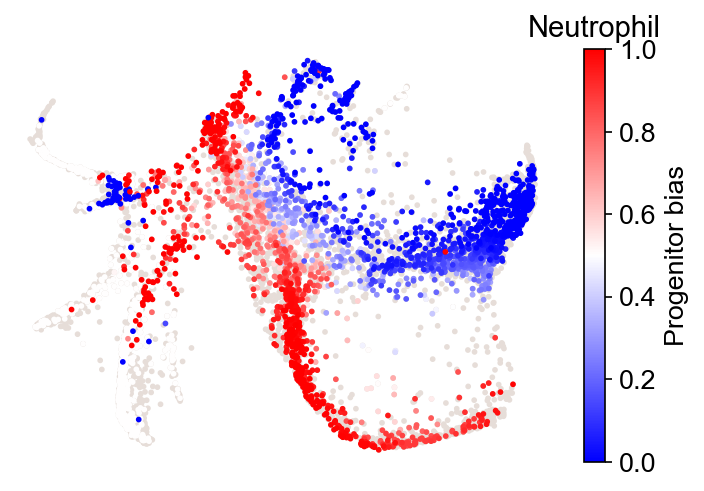

In [14]:
cs.tl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    pseudo_count=0,
)
cs.pl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    plot_target_state=False,
)

We can also study fate bias in the Gata1+ states. First, prepare a sate mask:

In [15]:
x_emb = adata.obsm["X_emb"][:, 0]
y_emb = adata.obsm["X_emb"][:, 1]

index_2 = cs.hf.above_the_line(adata.obsm["X_emb"], [100, 500], [500, -1000])
index_5 = cs.hf.above_the_line(adata.obsm["X_emb"], [0, -500], [1000, 2])
final_mask = (~index_2) & (
    (index_5 | (x_emb < 0))
)  # & index_3 & index_4 & index_5 #mask_1 &

Now, compute the fate bias. We can concatenate cluster 'Meg' and 'Erythroid' using a nested list. Same for concatenating 'Baso', 'Mast', and 'Eos'. 

Results saved at adata.obs['fate_map_transition_map_Meg_Erythroid']
Results saved at adata.obs['fate_map_transition_map_Baso_Mast_Eos']
Results saved at adata.obs['fate_bias_transition_map_Meg_Erythroid*Baso_Mast_Eos']


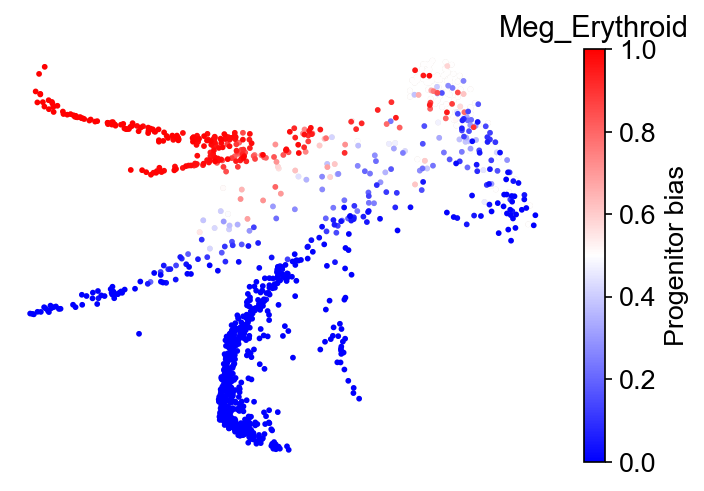

In [16]:
# cs.pl.fate_bias(adata,selected_fates=[['Meg','Erythroid'],['Baso','Mast','Eos']],source='transition_map',
#         plot_target_state=False,mask=final_mask,map_backward=True,sum_fate_prob_thresh=0.01,method='norm-sum')
cs.tl.fate_bias(
    adata,
    selected_fates=[["Meg", "Erythroid"], ["Baso", "Mast", "Eos"]],
    source="transition_map",
    pseudo_count=0,
    map_backward=True,
    sum_fate_prob_thresh=0.01,
    method="norm-sum",
)
cs.pl.fate_bias(
    adata,
    selected_fates=[["Meg", "Erythroid"], ["Baso", "Mast", "Eos"]],
    source="transition_map",
    plot_target_state=False,
    mask=final_mask,
    background=False,
)

### Dynamic trajectory inference

We can infer the dynamic trajectory and ancestor population using the fate bias from binary fate competition. Here, fate bias is a scalar between (0,1) at each state. Selected ancestor population satisfies:

   * P(i;A) + P(i;B) > sum_fate_prob_thresh; 

   * Ancestor states {*i*} for A: Bias_i > bias_threshold_A

   * Ancestor states {*i*} for B: Bias_i < bias_threshold_B

They will be stored at `adata.obs[f'progenitor_{source}_{fate_name}']` and `adata.obs[f'diff_trajectory_{source}_{fate_name}']`. 

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']
Results saved at adata.obs[f'progenitor_transition_map_Neutrophil'] and adata.obs[f'diff_trajectory_transition_map_Neutrophil']
Results saved at adata.obs[f'progenitor_transition_map_Monocyte'] and adata.obs[f'diff_trajectory_transition_map_Monocyte']


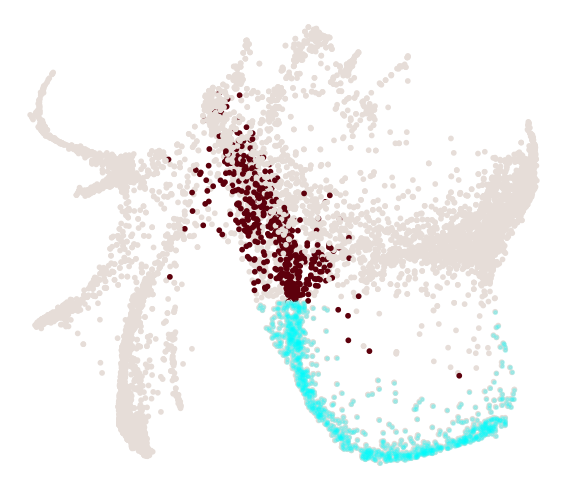

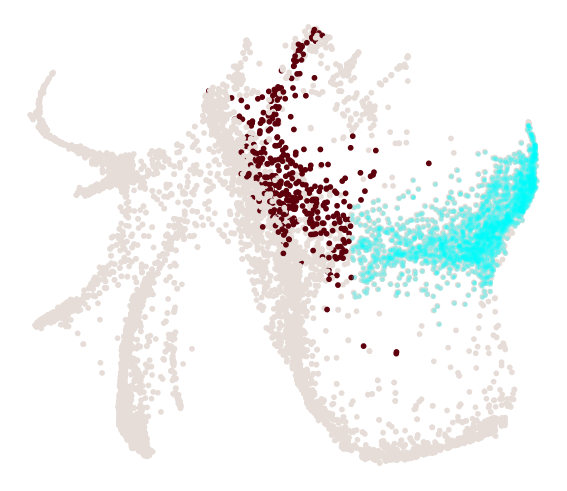

In [17]:
cs.tl.progenitor(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
    bias_threshold_A=0.5,
    bias_threshold_B=0.5,
    sum_fate_prob_thresh=0.2,
    avoid_target_states=True,
)
cs.pl.progenitor(
    adata, selected_fates=["Neutrophil", "Monocyte"], source="transition_map"
)

We can visualize the progenitors for Neutrophil directly

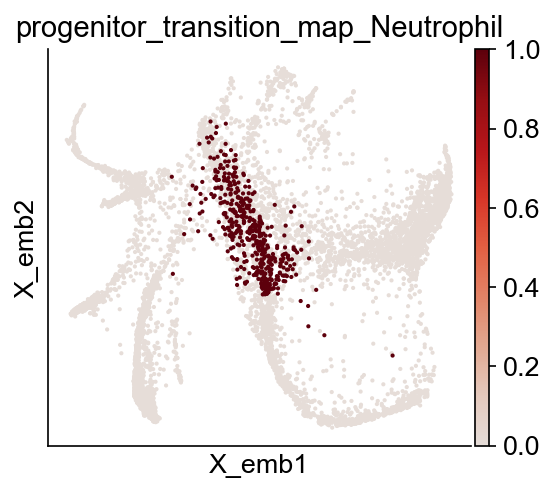

In [18]:
fate_name = "Neutrophil"  # Monocyte
traj_name = f"progenitor_transition_map_{fate_name}"
cs.pl.embedding(adata, color=traj_name)

We can also visualize the differentiation trajectory for Neutrophil.

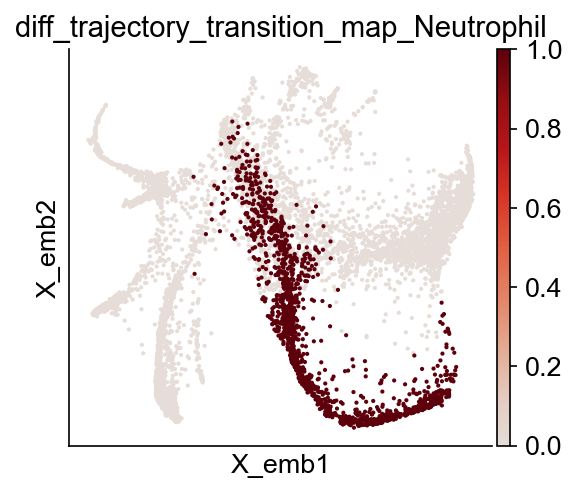

In [19]:
fate_name = "Neutrophil"  # Monocyte
traj_name = f"diff_trajectory_transition_map_{fate_name}"
cs.pl.embedding(adata, color=traj_name)

### Differential genes for two ancestor groups

It would be interesting to see what genes are differentially expressed between these two ancestor populations, which might drive fate bifurcation. We provide a simple differentiation gene expression analysis that uses Wilcoxon rank-sum test to calculate P values, followed by Benjamini-Hochberg correction. You can always use your own method.

In [20]:
import numpy as np

cell_group_A = np.array(adata.obs["diff_trajectory_transition_map_Neutrophil"])
cell_group_B = np.array(adata.obs["diff_trajectory_transition_map_Monocyte"])
dge_gene_A, dge_gene_B = cs.tl.differential_genes(
    adata, cell_group_A=cell_group_A, cell_group_B=cell_group_B, FDR_cutoff=0.05
)

In [21]:
dge_gene_A

,index,gene,Qvalue,mean_1,mean_2,ratio
0,5,Wfdc17,0.000000e+00,0.256167,24.515341,-4.344265
1,9,Lpl,9.000377e-267,0.798759,27.861982,-4.004097
2,0,Mmp8,0.000000e+00,1.777057,40.070595,-3.886477
3,304,H2-Aa,1.071471e-33,0.083807,14.977456,-3.881858
4,8,Ctss,1.935638e-273,0.130347,15.299898,-3.850025
...,...,...,...,...,...,...
1061,1789,H3f3a,2.146904e-04,17.266771,18.038162,-0.059673
1062,3329,Gm37214,4.577627e-02,1.208660,1.298273,-0.057379
1063,1881,mt-Co2,3.645677e-04,195.855591,203.123032,-0.052301
1064,2978,Nom1,2.363414e-02,0.813894,0.820711,-0.005412


Gene expression can be explored directly:

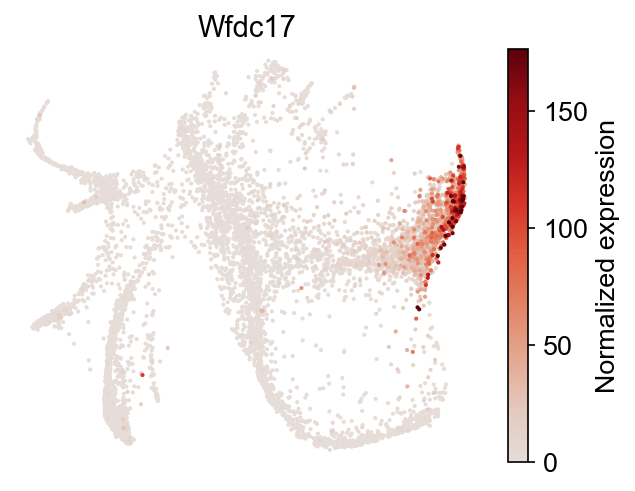

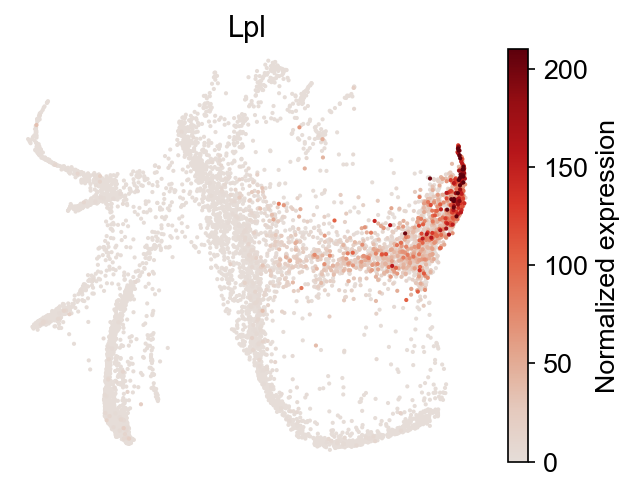

In [22]:
selected_genes = dge_gene_A["gene"][:2]
cs.pl.gene_expression_on_manifold(
    adata, selected_genes=selected_genes, color_bar=True, savefig=False
)

You can visualize the gene expression differences using a heat map.

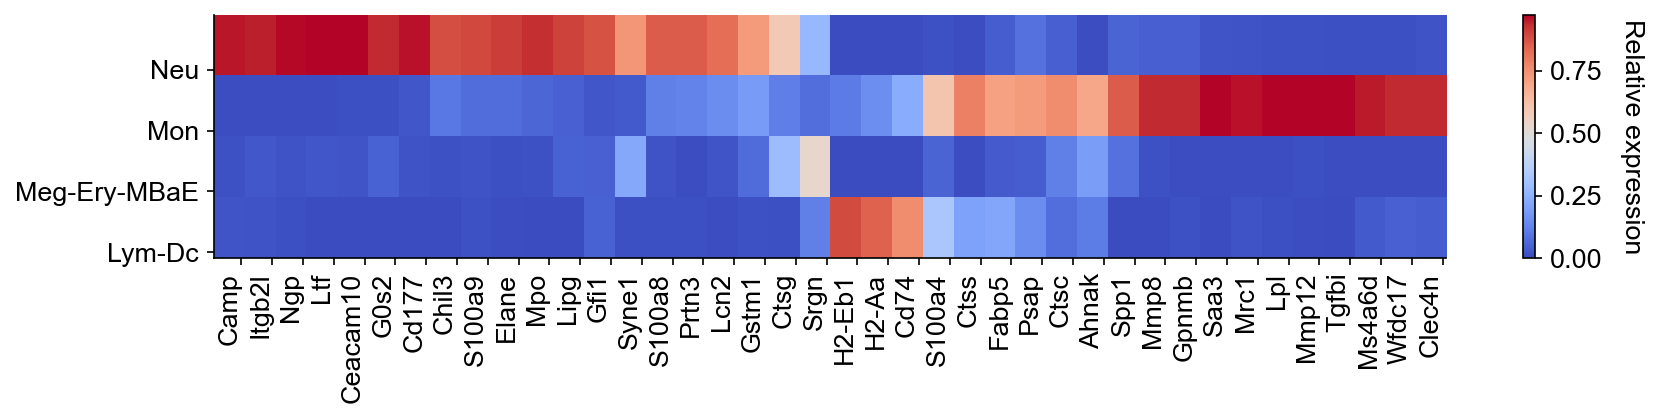

In [24]:
gene_list = list(dge_gene_A["gene"][:20]) + list(
    dge_gene_B["gene"][:20]
)  # select the top 20 genes from both populations

selected_fates = [
    "Neutrophil",
    "Monocyte",
    ["Baso", "Eos", "Erythroid", "Mast", "Meg"],
    ["pDC", "Ccr7_DC", "Lymphoid"],
]
renames = ["Neu", "Mon", "Meg-Ery-MBaE", "Lym-Dc"]
gene_expression_matrix = cs.pl.gene_expression_heatmap(
    adata,
    selected_genes=gene_list,
    selected_fates=selected_fates,
    rename_fates=renames,
    fig_width=12,
)

You can run the differential gene expression analysis on different cell clusters.

In [25]:
dge_gene_A, dge_gene_B = cs.tl.differential_genes(
    adata, cell_group_A="Neutrophil", cell_group_B="Monocyte"
)

### Gene expression dynamics

We can calculate the pseudotime along an inferred trajectory, and plot the gene expression along the pseudotime. This method requires that a trajectory has been inferred in previously steps.


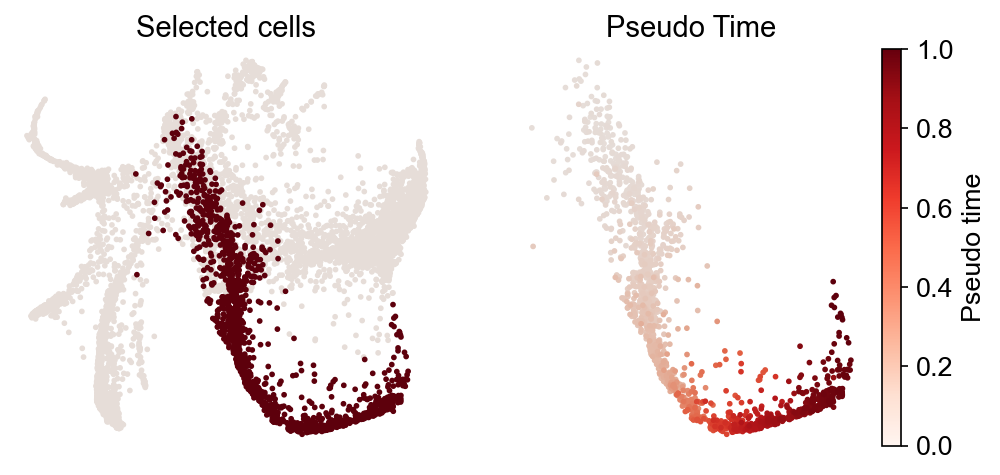

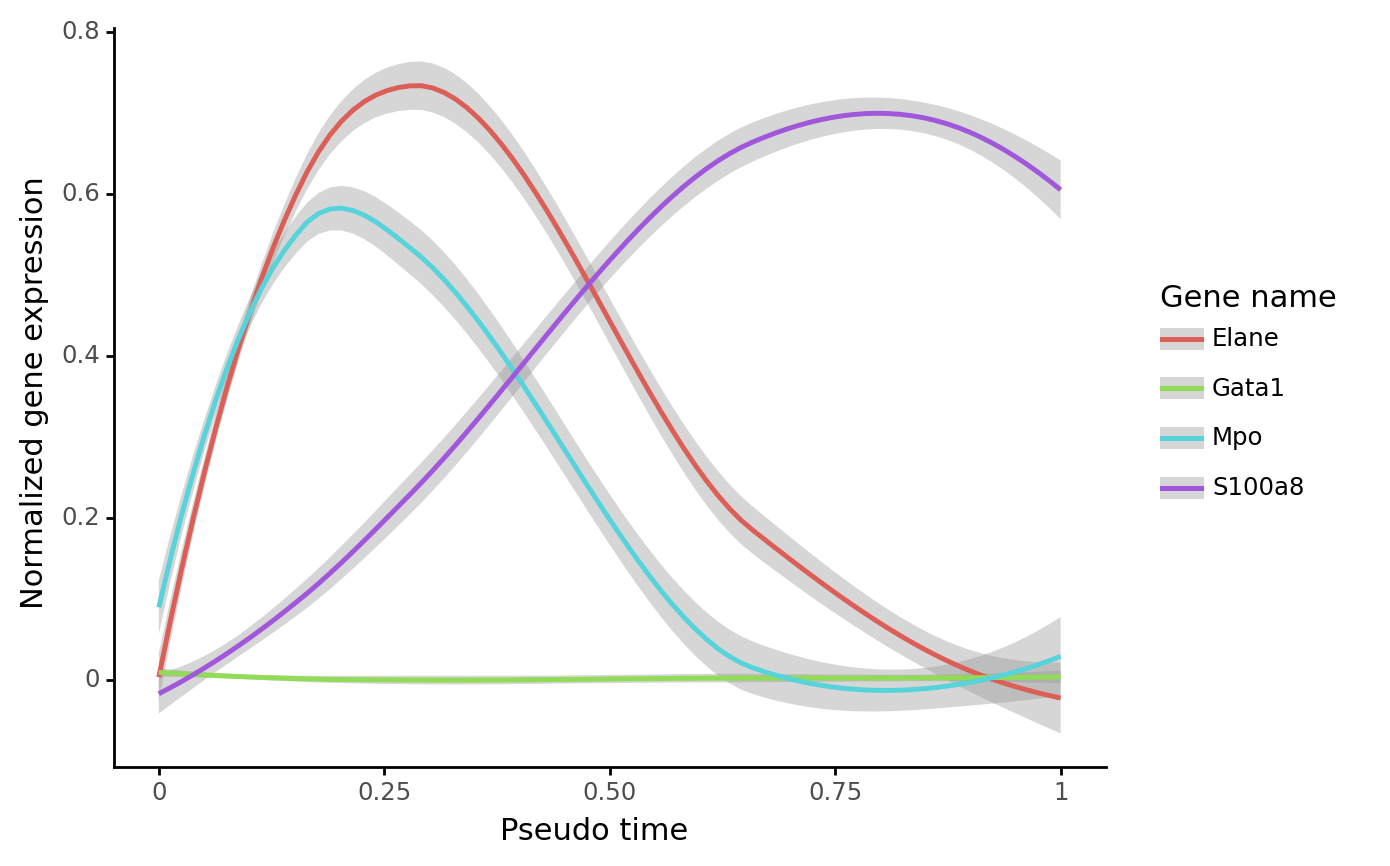

In [26]:
gene_name_list = ["Gata1", "Mpo", "Elane", "S100a8"]
selected_fate = "Neutrophil"
cs.pl.gene_expression_dynamics(
    adata,
    selected_fate,
    gene_name_list,
    traj_threshold=0.2,
    invert_PseudoTime=False,
    compute_new=True,
    gene_exp_percentile=99,
    n_neighbors=8,
    plot_raw_data=False,
)

### Fate coupling and hierarchy

The inferred transition map can be used to estimate differentiation coupling between different fate clusters. 

Results saved as dictionary at adata.uns['fate_coupling_transition_map']


<AxesSubplot:title={'center':'source: transition_map'}>

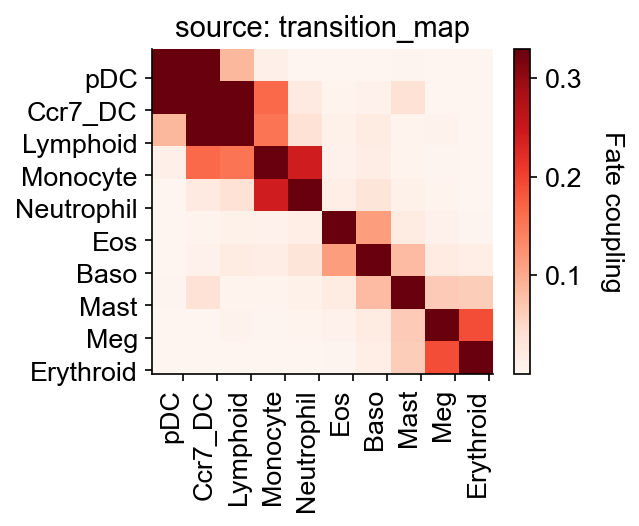

In [27]:
selected_fates = [
    "Ccr7_DC",
    "Mast",
    "Meg",
    "pDC",
    "Eos",
    "Lymphoid",
    "Erythroid",
    "Baso",
    "Neutrophil",
    "Monocyte",
]
cs.tl.fate_coupling(adata, selected_fates=selected_fates, source="transition_map")
cs.pl.fate_coupling(adata, source="transition_map")

We can also infer fate hierarchy from a transition map, based on the fate coupling matrix and using the neighbor-joining method.

In [28]:
cs.tl.fate_hierarchy(adata, selected_fates=selected_fates, source="transition_map")
cs.pl.fate_hierarchy(adata, source="transition_map")

Results saved as dictionary at adata.uns['fate_hierarchy_transition_map']

            /-Baso
         /-|
      /-|   \-Eos
     |  |
   /-|   \-Mast
  |  |
  |  |   /-Erythroid
  |   \-|
--|      \-Meg
  |
  |      /-Monocyte
  |   /-|
  |  |   \-Neutrophil
   \-|
     |      /-Lymphoid
     |   /-|
      \-|   \-Ccr7_DC
        |
         \-pDC


### Propagate a cluster in time

One way to define the dynamic trajectory is simply mapping a given fate cluster backward in time. The whole trajectory across multiple time points will be saved at `adata.obs[f'diff_trajectory_{source}_{fate_name}']`. This method requires having multiple clonal time points, and a transition map between neighboring time points. 



First, use all clonal time points (the default), and infer a transition map between neighboring time points (by not setting `later_time_point`).

In [29]:
adata_5 = cs.tmap.infer_Tmap_from_multitime_clones(
    adata_orig,
    smooth_array=[20, 15, 10, 5],
    sparsity_threshold=0.2,
    intraclone_threshold=0.2,
    max_iter_N=10,
    epsilon_converge=0.01,
)

------Compute the full Similarity matrix if necessary------
----Infer transition map between neighboring time points-----
Step 1: Select time points
Number of multi-time clones post selection: 500
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Iteration 4, Use smooth_round=5
Convergence (CoSpar, iter_N=4): corr(previous_T, current_T)=0.912
Iteration 5, Use smooth_round=5
Convergence (CoSpar, iter_N=5): corr(previous_T, current_T)=0.993
-----------Total used time: 17.11899995803833 s ------------


Results saved at adata.obs[f'diff_trajectory_intraclone_transition_map_Neutrophil']


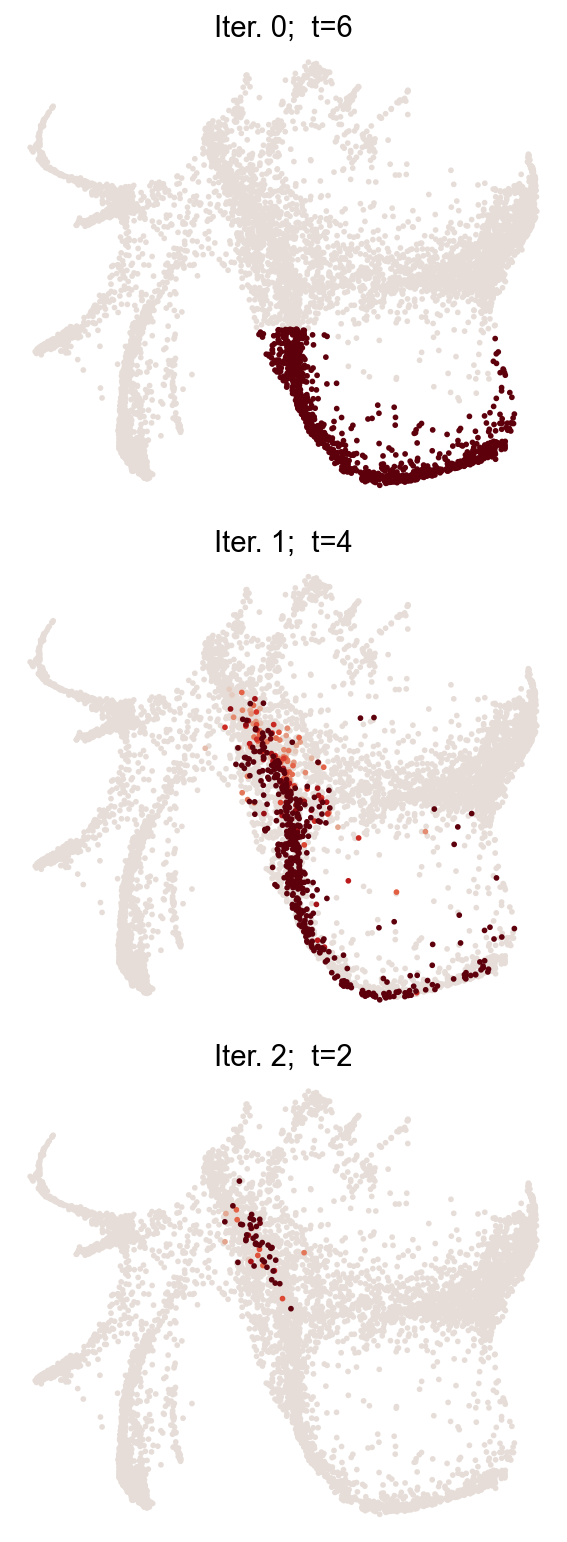

In [30]:
cs.tl.iterative_differentiation(
    adata_5, selected_fates="Neutrophil", source="intraclone_transition_map"
)
cs.pl.iterative_differentiation(adata_5, source="intraclone_transition_map")

The trajectory can be used for visualizing gene expression dynamics using `cs.pl.gene_expression_dynamics`, as shown above:

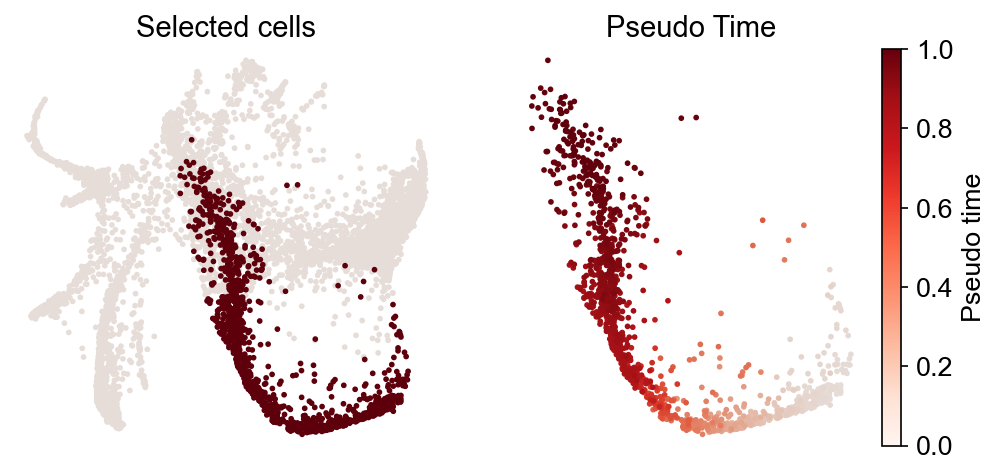

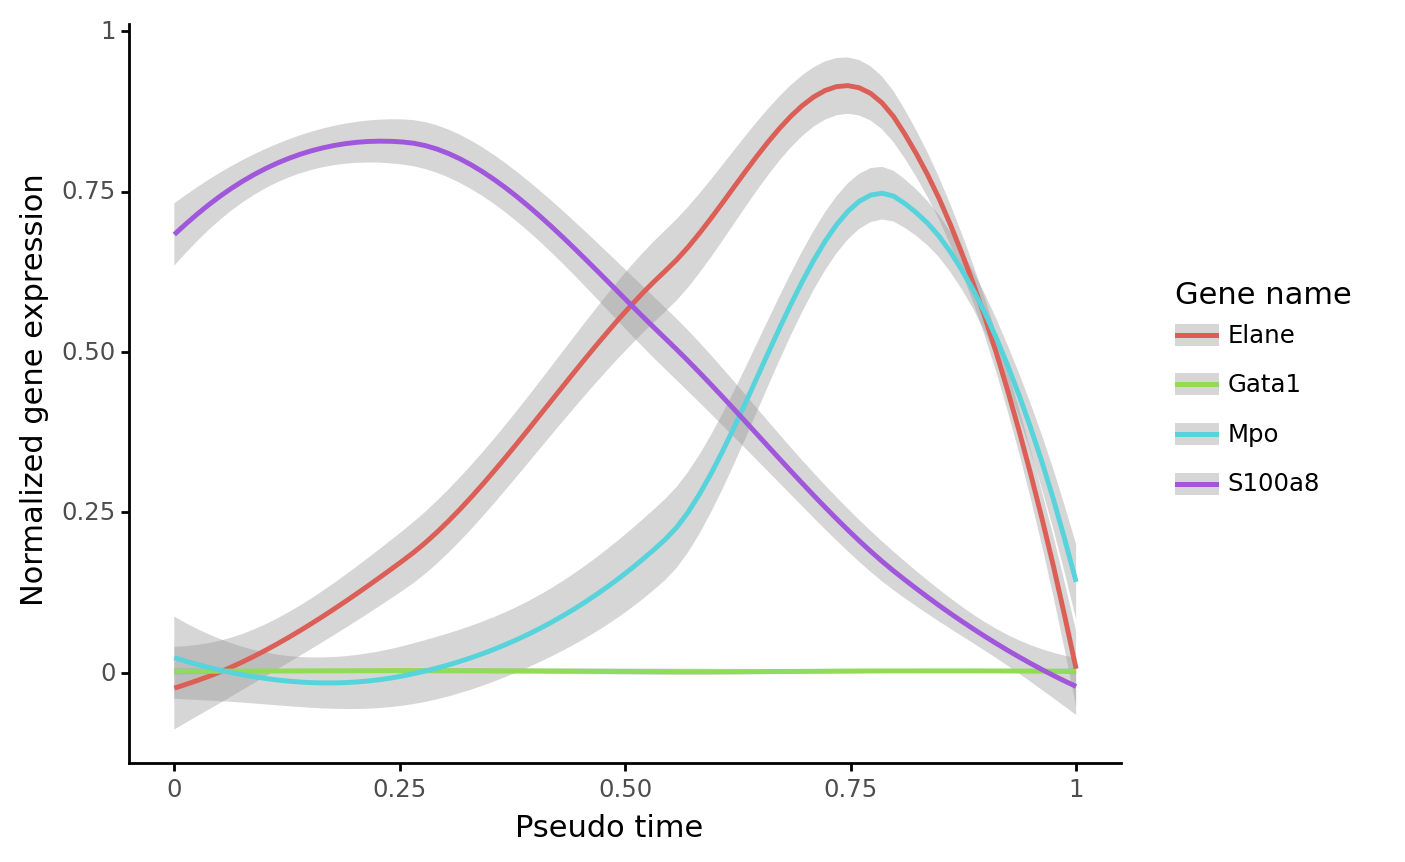

In [31]:
gene_name_list = ["Gata1", "Mpo", "Elane", "S100a8"]
selected_fate = "Neutrophil"
cs.pl.gene_expression_dynamics(
    adata_5,
    selected_fate,
    gene_name_list,
    traj_threshold=0.1,
    invert_PseudoTime=True,
    source="intraclone_transition_map",
)